In [8]:
import pandas as pd
import numpy as np

In [14]:
df=pd.read_csv('abalone.csv',names=range(1,9),header=1)
df.head()

,1,2,3,4,5,6,7,8
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [15]:
df.isnull().sum()

1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [16]:
df.dtypes

1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8      int64
dtype: object

In [17]:
df.describe()

,1,2,3,4,5,6,7,8
count,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524050,0.407926,0.139539,0.828962,0.359462,0.180644,0.238893,9.933174
std,0.120087,0.099237,0.041824,0.490393,0.221970,0.109615,0.139205,3.223668
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441750,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153500,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [42]:
df.rename(columns={8:'age_abalone'},inplace=True)
df.head()



,1,2,3,4,5,6,7,age_abalone
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [43]:
df.shape

(4175, 8)

This is the continuous type of data we will go through Linear Regressor Algorithm

In [44]:
import seaborn as sns
import matplotlib .pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

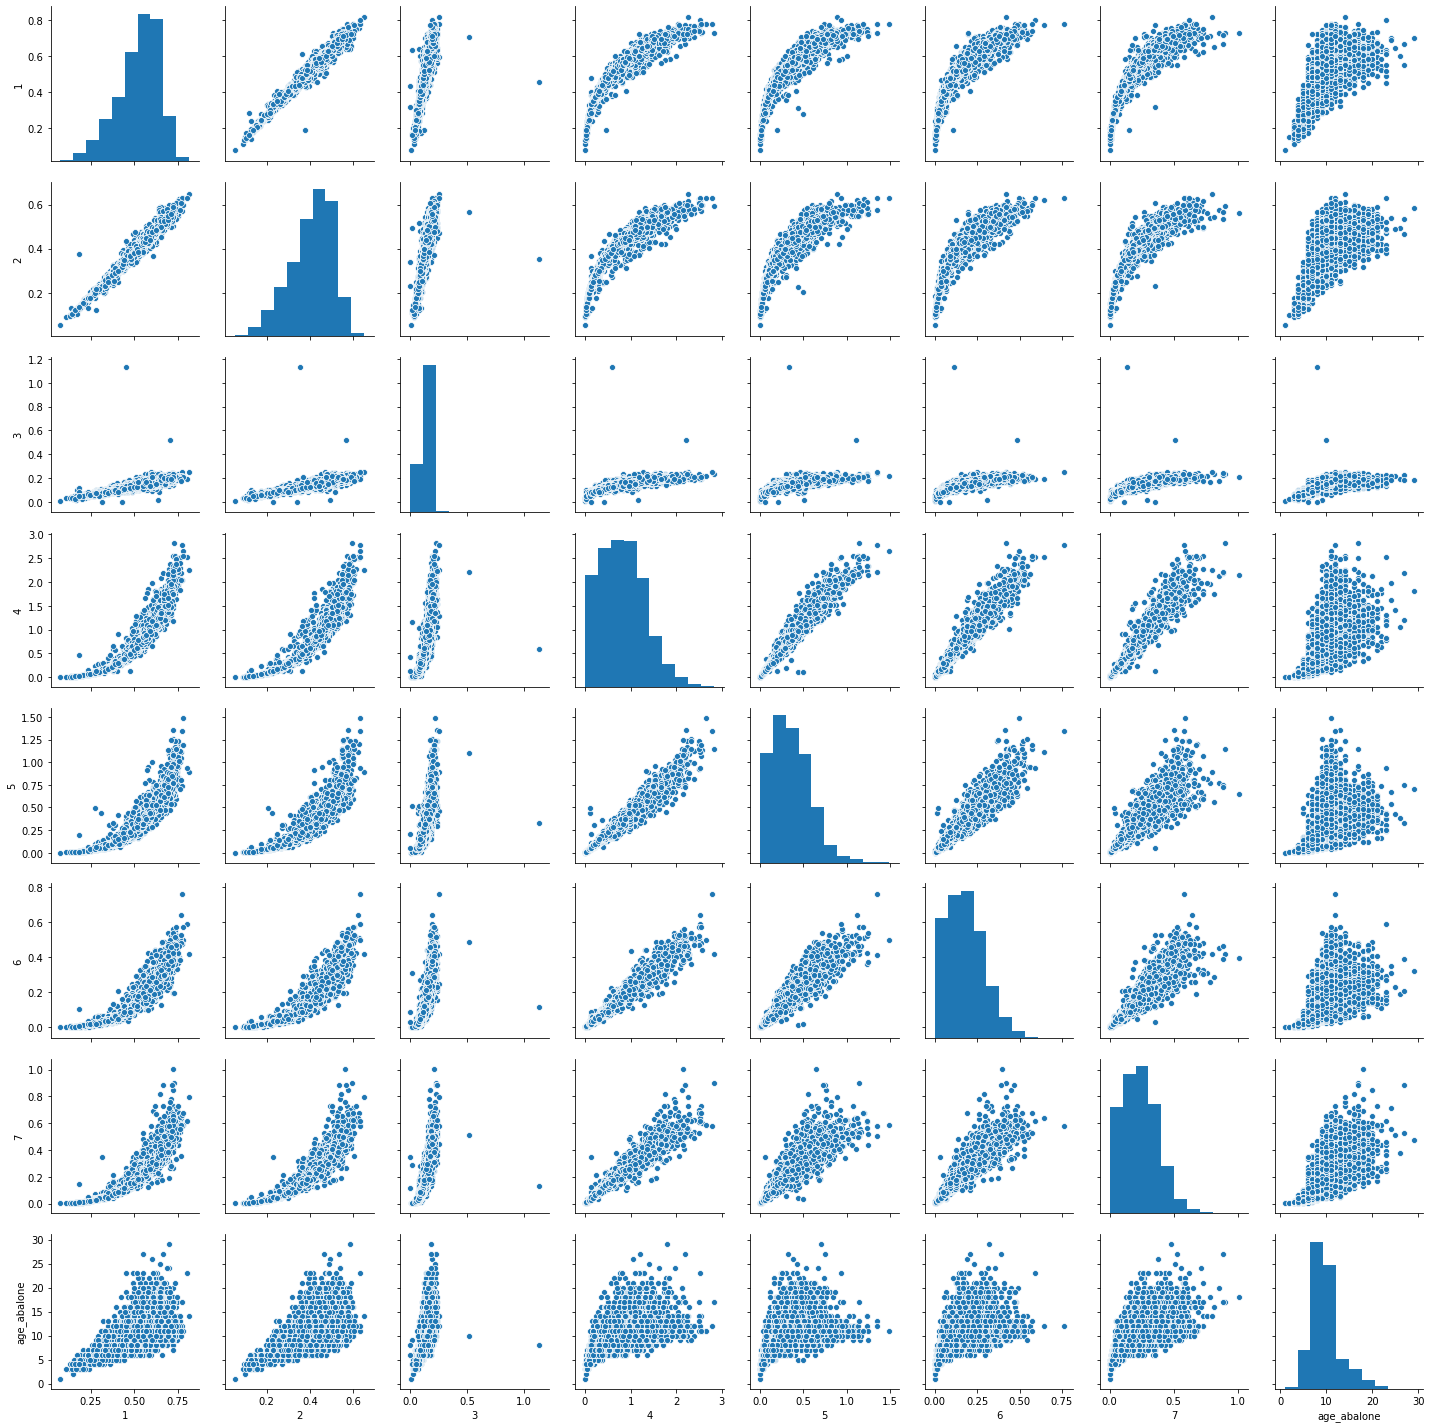

In [45]:
sns.pairplot(df)

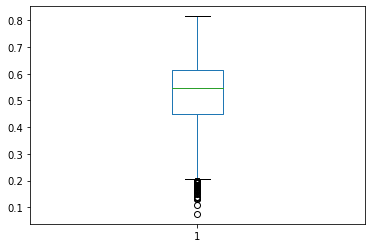

In [46]:
df[1].plot.box()

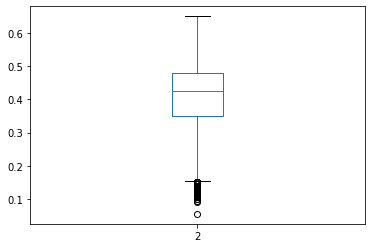

In [47]:
df[2].plot.box()

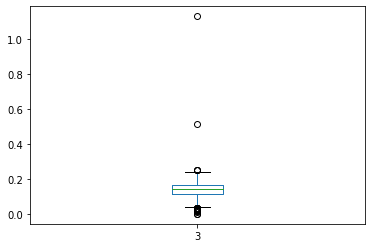

In [48]:
df[3].plot.box()

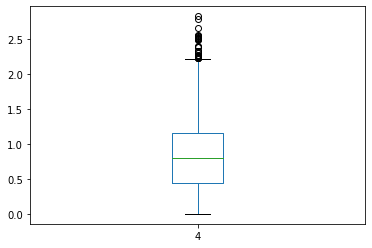

In [49]:
df[4].plot.box()

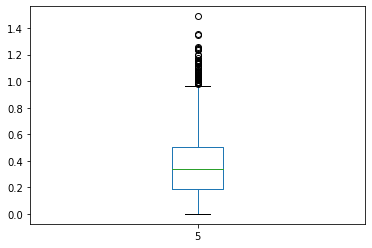

In [50]:
df[5].plot.box()

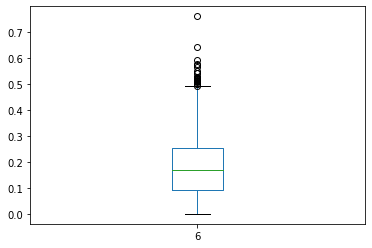

In [51]:
df[6].plot.box()

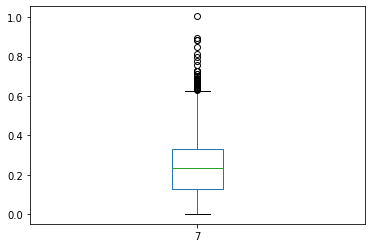

In [52]:
df[7].plot.box()

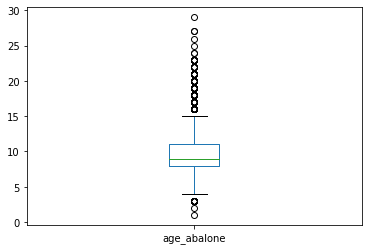

In [54]:
df['age_abalone'].plot.box()

we can say that the outliers are presnt in the data

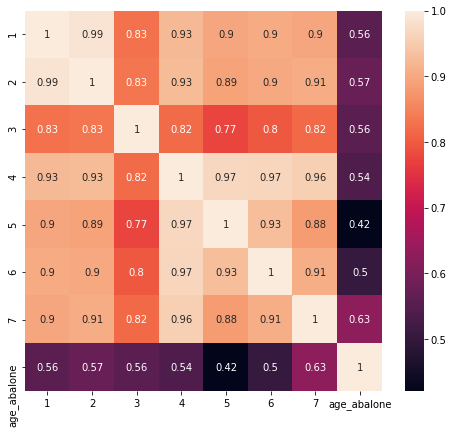

In [55]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

so from this plot we can say that strong corelation between col no.8 and 7.
but week relation between col no.8 and 6.

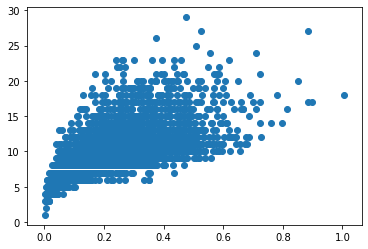

In [67]:
x=df[7]
y=df['age_abalone']
plt.scatter(x,y)
plt.show()

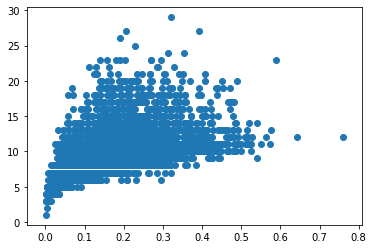

In [68]:
x=df[6]
y=df['age_abalone']
plt.scatter(x,y)
plt.show()

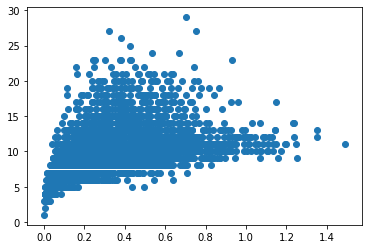

In [69]:
x=df[5]
y=df['age_abalone']
plt.scatter(x,y)
plt.show()

In [72]:
x=df.iloc[:,:-1]
x.head()

,1,2,3,4,5,6,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330


In [73]:
y=df.iloc[:,-1]
y.head()

F     9
M    10
I     7
I     8
F    20
Name: age_abalone, dtype: int64

In [74]:
x.shape

(4175, 7)

In [75]:
y.shape

(4175,)

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=47)

In [77]:
lr=LinearRegression()


In [78]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
print(lr.intercept_)
print(lr.coef_)
print(lr.score(x_train,y_train))

2.5990431818572564
[ -0.55726347  14.63542768   8.28269609  10.49339971 -22.66787511
 -10.85283739   7.86065747]
0.5471222692601116


from Linear Regression we are getting only 54% Accuracy Score
Lets try some other Regressor

In [84]:
#KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.6867589271364869

In [86]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [87]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

1.0

In [88]:
From the Regressor method we can conclude that Decision Tree Regressor provides 100% Accuracy

SyntaxError: invalid syntax (<ipython-input-88-b09d0e5c5dbb>, line 1)